<a href="https://colab.research.google.com/github/annLiu310/python-basic/blob/master/15_SeaBorn_Distribution_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribution Plots



* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [0]:
import seaborn as sns
# we can se visulization inside of notebook
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [0]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## distplot

The distplot shows the distribution of a univariate set of observations.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


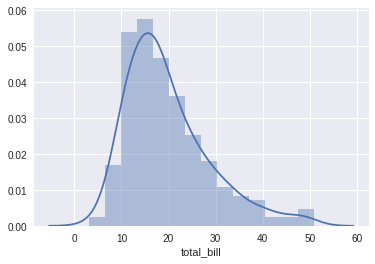

In [6]:
# check how the total bill distributed
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


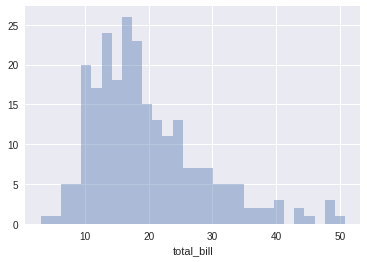

In [8]:
# remove kde layer (curve)
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”


combine two different plots

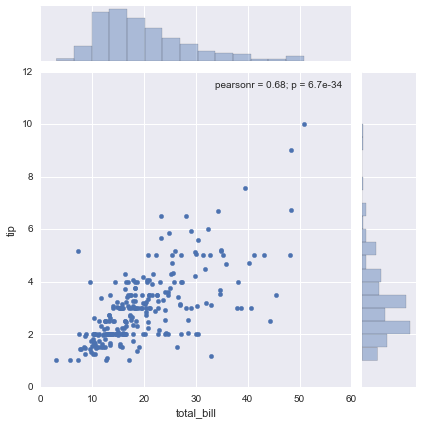

In [0]:
## Pass  x, y, dataset, plotkind
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


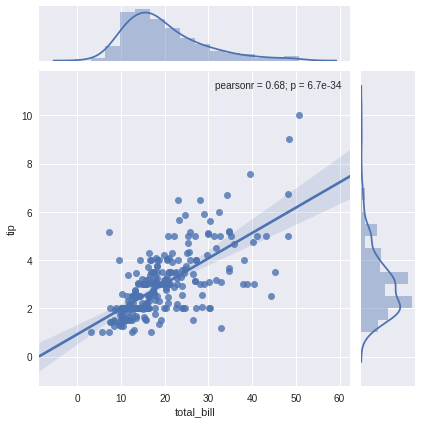

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


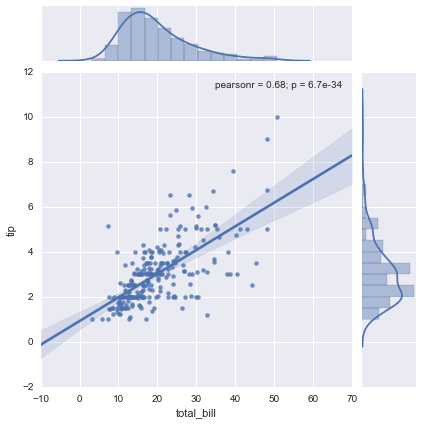

In [0]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will **plot** pairwise **relationships** across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

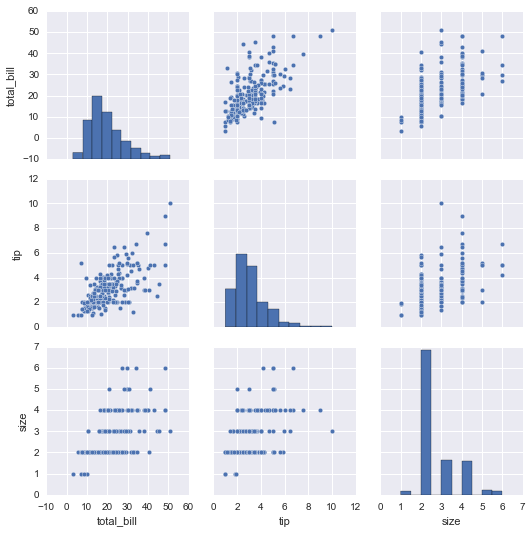

In [0]:
sns.pairplot(tips)

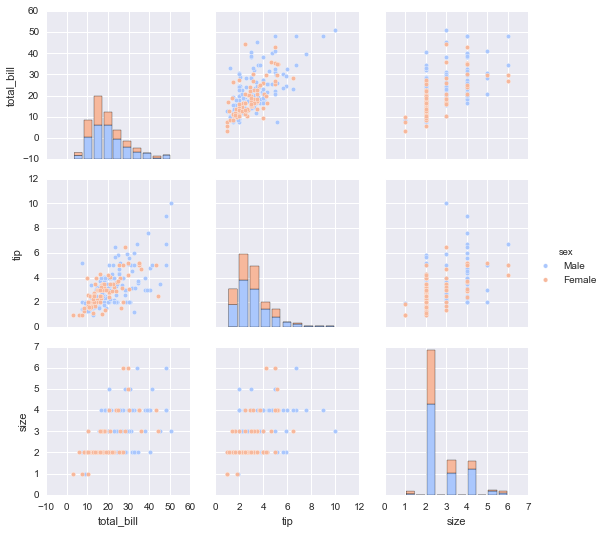

In [0]:
# pass column as category,  palette,  collor style
sns.pairplot(tips,hue='sex',palette='coolwarm')
# seperate by two column

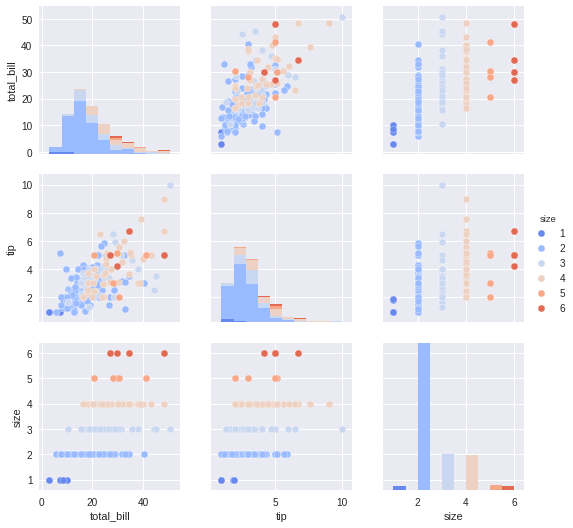

In [13]:
# pass column as category,  palette,  collor style
sns.pairplot(tips, hue='size',palette='coolwarm')
# seperate by two column

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

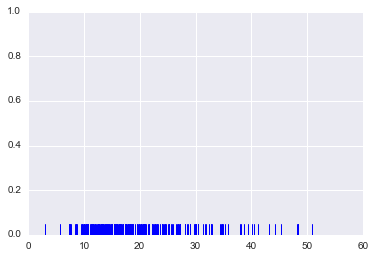

In [0]:
sns.rugplot(tips['total_bill'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


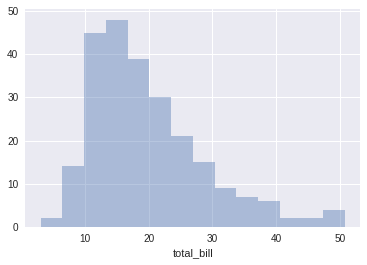

In [18]:
sns.distplot(tips['total_bill'], kde = False)

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

[ 0.15219618  1.14313491 -0.94052351 -2.11236759 -0.91131141 -1.11489092
 -0.73566759  0.61383509 -0.45042346 -1.71667916  0.24598902 -0.25262155
 -0.41125179 -1.1846032   0.0528549   1.0280884   1.8811348  -0.72328677
  0.56642103  0.08609817 -0.76673    -1.83463501 -0.59142655 -0.96822681
 -0.83240015]
bandwidth:  0.5228486231221566


(0, 1)

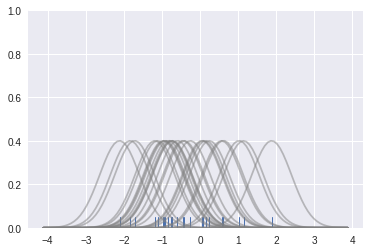

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)
print(dataset)


# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
# 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
print('bandwidth: ', bandwidth)

# Create another rugplot
sns.rugplot(dataset);

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    # goussin distribution
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

[-0.60557272  1.47266351  0.69485654  2.6998798   1.14016569 -0.07968816
  0.27263675  0.31139333 -1.06582822 -1.51174598  1.98304556  0.40781388
  0.72964773  0.13392885 -1.51384013  1.51573599 -0.34772202  0.44705569
  2.1676006  -0.06057262 -1.59073672  0.20991964 -0.01378138 -0.66510959
  0.09233907]


(0, 1)

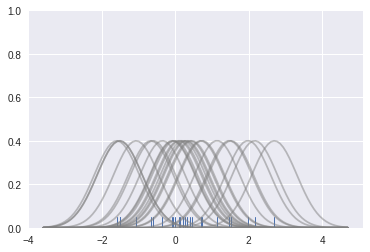

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)
print(dataset)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

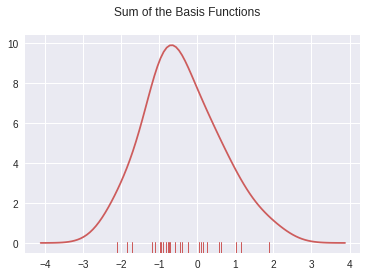

In [31]:
# To get the kde plo, sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


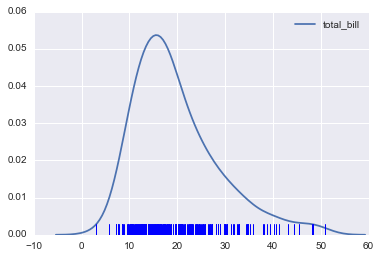

In [0]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

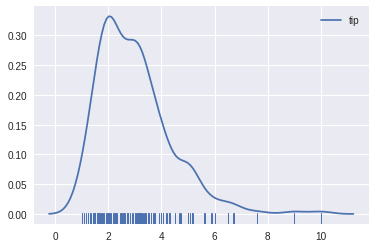

In [32]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])